# 任务一 复合函数的计算图，计算器雅可比行列式

## 1.1 numpy实现

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Computational_Graph:
    def __init__(self) -> None:
    #初始化x1，x2，x3
        self.x1 = 0
        self.x2 = 0
        self.x3 = 0
        #初始化z1，z2，z3，用以存储z1，z2，z3的计算结果
        self.z1 = 0
        self.z2 = 0
        self.z3 = 0
        #初始化u1，u2，u3，用以存储u1，u2，u3的计算结果
        self.u1 = 0
        self.u2 = 0
        self.u3 = 0
        #初始化v1，v2，v3，用以存储v1，v2，v3的计算结果
        self.u1 = 0
        self.u2 = 0
        self.u3 = 0
        #初始化y1，y2，用以存储y1，y2的计算结果
        self.y1 = 0
        self.y2 = 0 
        
    def function_z1(self,x1,x2):   
        return 2*x1 + x2
    def function_z2(self,x1,x3):
        return  x1 * 3 * x3   
    def function_z3(self,x3):
        return  -x3
    def function_u1(self,z1):
        return  np.sin(self.z1)
    def function_u2(self,x3,z2):
        return (2 * x3)+z2
    def function_u3(self,z1,z3):
        return (2 * z1) + z3
    def function_v1(self,u1,u3):    
        return u1 - u3
    def function_v2(self,u2): 
        return np.sin(-1*u2)      
    def function_v3(self,u1,u3):
        return u1 * u3
    def function_y1(self,v1,v2):
        return v1**2 + v2**3
    def function_y2(self, v2, v3):
        return v2*v3

#前向传播
    def forward(self,x1,x2,x3):
        self.x1 = x1
        self.x2 = x2
        self.x3 = x3

        self.z1 = self.function_z1(self.x1, self.x2)
        self.z2 = self.function_z2(self.x1, self.x3)
        self.z3 = self.function_z3(self.x3)

        self.u1 = self.function_u1(self.z1)
        self.u2 = self.function_u2(self.x3, self.z2)
        self.u3 = self.function_u3(self.z1, self.z3)

        self.v1 = self.function_v1(self.u1, self.u3)
        self.v2 = self.function_v2(self.u2)
        self.v3 = self.function_v3(self.u1, self.u3)

        self.y1 = self.function_y1(self.v1, self.v2)
        self.y2 = self.function_y2(self.v2, self.v3)

        print(f'y1 = {self.y1}, y2 = {self.y2}')



#反向传播
    def backward(self):
        self.y1_to_v1 = 2 * self.v1
        self.y1_to_v2 = 3*(self.v2**2)

        self.y2_to_v2 = self.v3
        self.y2_to_v3 = self.v2

        # backward
        self.v1_to_u1 = 1
        self.v1_to_u3 = -1

        self.v2_to_u2 = -1 * np.cos(-1 * self.u2)
        
        self.v3_to_u1 = self.u3
        self.v3_to_u3 = self.u1


        # back
        self.u1_to_z1 = np.cos(self.z1)

        self.u2_to_x3 = 2 
        self.u2_to_z2 = 1

        self.u3_to_z1 = 2
        self.u3_to_z3 = 1


        # back
        self.z1_to_x1 = 2
        self.z1_to_x2 = 1

        self.z2_to_x1 = 3*self.x3
        self.z2_to_x3 = 3*self.x1

        self.z3_to_x3 = -1

        # all 
        self.y1_to_x1 = self.y1_to_v1 * (self.v1_to_u1*(self.u1_to_z1*self.z1_to_x1) + self.v1_to_u3 * self.u3_to_z1*self.z1_to_x1) + self.y1_to_v2*self.v2_to_u2*self.u2_to_z2*self.z2_to_x1
        self.y1_to_x2 = self.y1_to_v1 * (self.v1_to_u1*(self.u1_to_z1*self.z1_to_x2)+ self.v1_to_u3*self.u3_to_z1*self.z1_to_x2)
        self.y1_to_x3 = self.y1_to_v1 * (self.v1_to_u3*self.u3_to_z3*self.z3_to_x3) + self.y1_to_v2*self.v2_to_u2*(self.u2_to_x3 +self.u2_to_z2*self.z2_to_x3)

        self.y2_to_x1 = self.y2_to_v2 * (self.v2_to_u2 * self.u2_to_z2 * self.z2_to_x1) + self.y2_to_v3* (self.v3_to_u1 *self.u1_to_z1 * self.z1_to_x1 + self.v3_to_u3 *self.u3_to_z1*self.z1_to_x1)
        self.y2_to_x2 = self.y2_to_v3 * (self.v3_to_u1 * self.u1_to_z1 *self.z1_to_x2 + self.v3_to_u3*self.u3_to_z1*self.z1_to_x2)
        self.y2_to_x3 = self.y2_to_v2 * (self.v2_to_u2 * (self.u2_to_x3+ self.u2_to_z2*self.z2_to_x3))+ self.y2_to_v3*self.v3_to_u3*self.u3_to_z3*self.z3_to_x3


In [3]:
res = Computational_Graph()
res.forward(1,1,1)
res.backward()

print(f"1,1,1 输入的雅可比行列式为 \n {res.y1_to_x1} {res.y1_to_x2} {res.y1_to_x3} \n {res.y2_to_x1} {res.y2_to_x2} {res.y2_to_x3}")

y1 = 24.490479942112778, y2 = 0.6766170068463221
1,1,1 输入的雅可比行列式为 
 55.76452114990751 29.056029435566057 -13.630322852587943 
 -9.55244091025101 -4.475992380884129 -1.1360836488405153


In [4]:
res = Computational_Graph()
res.forward(2,1,3)
res.backward()

print(f"2,1,3 输入的雅可比行列式为 \n {res.y1_to_x1} {res.y1_to_x2} {res.y1_to_x3} \n {res.y2_to_x1} {res.y2_to_x2} {res.y2_to_x3}")

y1 = 64.08711522201764, y2 = -6.078667517564845
2,1,3 输入的雅可比行列式为 
 45.248661012182595 27.320405391278015 -24.266426122991554 
 25.74837188319024 0.061386213049383465 23.646691702463592


In [5]:
res = Computational_Graph()
res.forward(-1,-1,-3)
res.backward()

print(f"-1,-1,-3 输入的雅可比行列式为 \n {res.y1_to_x1} {res.y1_to_x2} {res.y1_to_x3} \n {res.y2_to_x1} {res.y2_to_x2} {res.y2_to_x3}")

y1 = 8.170384423581151, y2 = -0.05974457002445096
-1,-1,-3 输入的雅可比行列式为 
 -34.72443898265999 -17.096059449164276 5.658613307843439 
 -4.530696293583008 -0.37929353394875487 -0.43903810397320575


## 1.2 pytorch实现

In [6]:
import torch

class Net(torch.nn.Module):
    def forward(self, x):
            x1 = x[0]
            x2 = x[1]
            x3 = x[2]

            z1 = 2*x1 + x2
            z2= x1 * 3 * x3   
            z3 = -x3

            u1 =  torch.sin(z1)
            u2 = (2 * x3)+z2
            u3 =(2 * z1) + z3

            v1 = u1 - u3
            v2 = torch.sin(-1*u2)      
            v3 = u1 * u3

            y1 =  v1**2 + v2**3
            y2 =  v2*v3

            return y1,y2


In [7]:
x = torch.tensor([1,1,1], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_1.backward()

print(x.grad)

x = torch.tensor([1,1,1], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_2.backward()

print(x.grad)

tensor([ 55.7645,  29.0560, -13.6303], dtype=torch.float64)
tensor([-9.5524, -4.4760, -1.1361], dtype=torch.float64)


In [8]:
x = torch.tensor([2,1,3], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_1.backward()

print(x.grad)

x = torch.tensor([2,1,3], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_2.backward()

print(x.grad)

tensor([ 45.2487,  27.3204, -24.2664], dtype=torch.float64)
tensor([25.7484,  0.0614, 23.6467], dtype=torch.float64)


In [9]:
x = torch.tensor([-1,-1,-3], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_1.backward()

print(x.grad)

x = torch.tensor([-1,-1,-3], dtype=float, requires_grad=True)
model = Net()
out_1, out_2 = model(x)

out_2.backward()

print(x.grad)

tensor([-34.7244, -17.0961,   5.6586], dtype=torch.float64)
tensor([-4.5307, -0.3793, -0.4390], dtype=torch.float64)


# 任务二 numpy实现前向神经网络进行分类

## 2.1 网络结构搭建

In [10]:
# 初始化每一层的W、b矩阵
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    # number_of_layers = len(nn_architecture)
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]

        # 每一层的参数W、b依次编号
        # 不使用2个列表装载所有参数，每层参数独立命名
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
        
    print(nn_architecture)
    
    return params_values

# print(init_layers(nn_architecture))

In [11]:
# 定义激活函数以及他们的导数
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def sigmoid_backward(A, Z):
    sig = sigmoid(Z)
    dZ = A * sig * (1 - sig)
    return dZ

def softmax(Z):
    Z = np.exp(Z) / np.sum(np.exp(Z), axis = 1, keepdims = True)
    return Z

def softmax_backward(A, Z):
    dZ = np.zeros_like(Z)
    m, n = Z.shape

    for i in range(m):
        for j in range(n):
            dZ[i, j] = Z[i, j] * (np.eye(n)[j] - Z[i, :]).dot(A[i, :])

    return dZ

In [12]:
# 定义前向传播(前一层输出A，本层W、b，激活函数)
def single_forward(A, W, b, active_func):
    Z = np.dot(W, A) + b
    
    return active_func(Z), Z

def forward(X, params, nn_architecture):
    memory = {} # 记忆字典，用来储存前向传播的结果，供之后的方向传播使用
    A_curr = X 

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr

        # 开始本层传播
        active_func_curr = layer["activation"]
        W_curr = params["W" + str(layer_idx)]
        b_curr = params["b" + str(layer_idx)]
        A_curr, Z_curr = single_forward(A_prev, W_curr, b_curr, active_func_curr)

        memory["A"+str(idx)] = A_prev # A_0就是整个网络的输入X
        memory["Z"+str(layer_idx)] = Z_curr # 不存在Z_0，Z是某一层的没有经过激活函数的输出

    return A_curr, memory


### 反向传播的四个方程式
1. 损失函数 对 隐藏层最后非激活输出Z 的偏导 = （损失函数 对 隐藏层最后激活输出a 的偏导） （*） （隐藏层最后激活函数 的导数 = 隐藏层最后激活输出 对 隐藏层最后非激活输出Z 的偏导）
2. 损失函数 对 当前层最后非激活输出Z 的偏导 = （当前层权重W * （下一层 本值）） （*） （当前层最后激活函数 的导数）
3. 损失函数 对 当前层权重W 的偏导 = （当前层 的2） * （上一层激活输出a）
4. 损失函数 对 当前层偏置b 的偏导 = 当前层 的2

In [13]:
# 损失函数——交叉商损失
def cross_entropy_loss(Y_hat, Y):
    delta=1e-10  # 避免出现log0
    Y_hat = np.clip(Y_hat, delta, 1 - delta) 
    print(Y_hat)
    loss = -np.sum(Y * np.log(Y_hat))

    return loss


# 反向传播
# 单层-需要上层A，本层W、Z, 另需要本层A供激活函数求导
def single_backward(A_prev, W_curr, Z_curr, dA_curr, active_func_backward):
    m = A_prev.shape[1]


    dZ_curr = active_func_backward(dA_curr, Z_curr)
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

#  全层
def backward(Y_hat, Y, memory, params, nn_architecture):
    grads_values = {}
    m = Y.shape[1]
    Y = Y.reshape(Y_hat.shape)

    dA_prev = Y_hat - Y # softmax交叉熵损失梯度

    for idx, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx = idx + 1
        dA_curr = dA_prev

        # 开始本层方向传播
        activ_function_curr = layer["activation"]
        A_prev = memory["A" + str(idx)]
        Z_curr = memory["Z" + str(layer_idx)]
        W_curr = params["W" + str(layer_idx)]
        b_curr = params["b" + str(layer_idx)]

        active_func_backward = globals()[activ_function_curr.__name__ + '_backward']
        dA_prev, dW_curr, db_curr = single_backward(
            A_prev, W_curr, Z_curr, dA_curr, active_func_backward)

        grads_values["dW" + str(layer_idx)] = dW_curr
        grads_values["db" + str(layer_idx)] = db_curr

    return grads_values



# 参数更新
def update(params, grads_values, nn_architecture, learning_rate):
    for idx, layer in enumerate(nn_architecture):
        layer_idx =  idx + 1
        params["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]        
        params["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params;

## 2.2 读取数据集

[0 8 6 0 2 5 3 9 4 1]


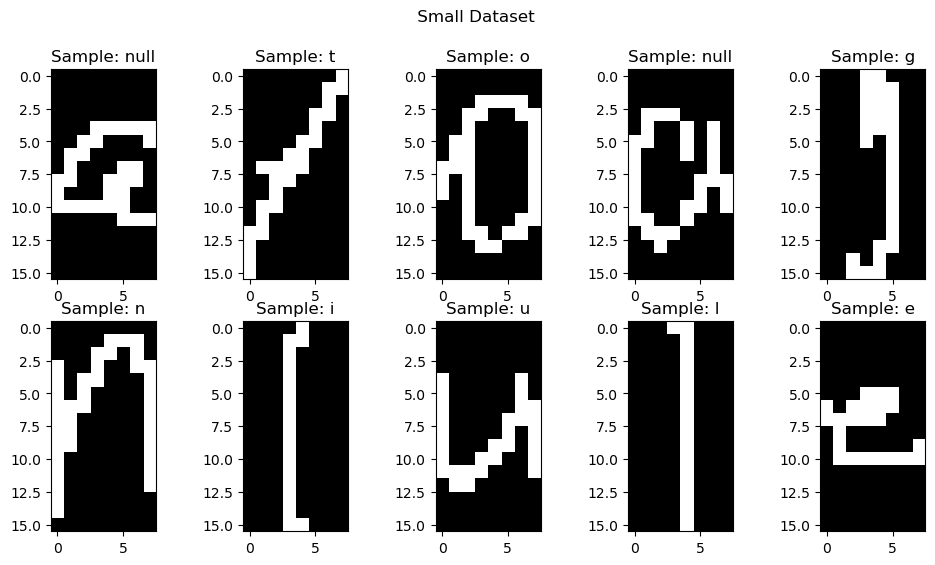

[6 8 5 9 3 3 3 1 9 6]


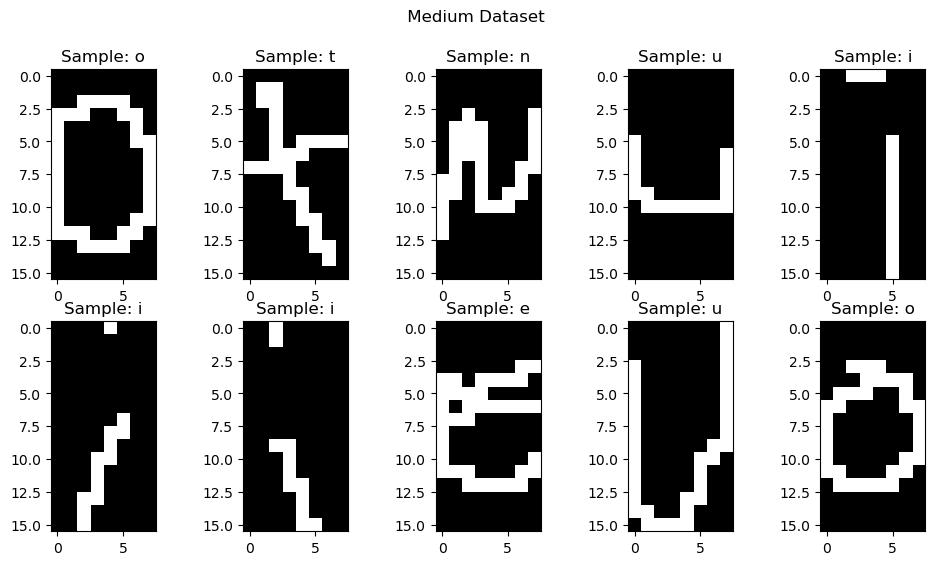

[1 3 0 5 3 5 6 2 2 1]


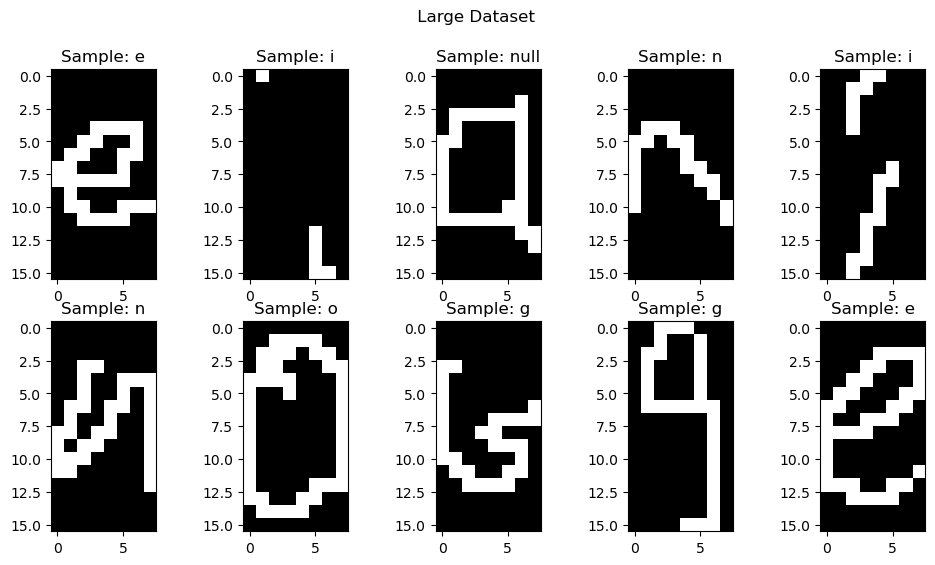

     0    1    2    3    4    5    6    7    8    9    ...  119  120  121  \
0      6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1      9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2      3    0    0    0    0    0    1    0    0    0  ...    0    0    0   
3      7    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      8    0    0    0    0    0    1    0    0    0  ...    1    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
495    3    0    0    0    0    1    1    0    0    0  ...    0    0    0   
496    0    0    0    0    0    0    0    0    0    1  ...    1    1    0   
497    2    0    0    1    1    1    0    0    0    0  ...    1    1    1   
498    6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
499    6    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     122  123  124  125  126  127  128  
0      0    0    0    0    0    0 

In [40]:
# 读取CSV文件并展示样本
def read_csv_and_display_samples(csv_file, dataset_name):
    df = pd.read_csv(csv_file, header=None)

    # 随机选择10个样本
    random_samples = df.sample(n=10)

    # 从CSV中提取图像数据
    image_data = random_samples.drop(0, axis=1).values
    image_class = random_samples[0].values

    # a,” 1 to “e,” 2 to “g,” 3 to “i,” 4 to “l,” 5 to “n,” 6 to “o,” 7 to “r,” 8 to “t,” and 9 to “u.” 
    id_2_name = {0:'null', 1:'e', 2:'g', 3:'i', 4:'l', 5:'n', 6:'o', 7:'r', 8:'t', 9:'u'}

    # 显示图像
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        # image = image_data[i].reshape(128, 128)  
        image = image_data[i].reshape(16, 8)

        plt.imshow(image, cmap='gray')
        plt.title(f"Sample: {id_2_name[image_class[i]]}")

    plt.suptitle(f" {dataset_name} Dataset")
    plt.show()

    return df

# 读取并显示各个数据集的样本
small_train = read_csv_and_display_samples('./图像分类-dataset/smallTrain.csv', 'Small')
medium_train = read_csv_and_display_samples('./图像分类-dataset/mediumTrain.csv', 'Medium')
large_train = read_csv_and_display_samples('./图像分类-dataset/largeTrain.csv', 'Large')



In [41]:
# 网络基本结构

# nn_architecture = [
#     {"input_dim": 128, "output_dim":64, "activation": "sigmoid"},
#     {"input_dim": 64, "output_dim": 32, "activation": "sigmoid"},
#     {"input_dim": 32, "output_dim": 9, "activation": "softmax"},
# ]

nn_architecture = [
    {"input_dim": 2, "output_dim":4, "activation": sigmoid},
    {"input_dim": 4, "output_dim": 3, "activation": sigmoid},
    {"input_dim": 3, "output_dim": 3, "activation": softmax},
]


X = [3,6]
X = np.array(X).reshape(-1, 1)
Y = [0.9,0,0.1]
Y = np.array(Y).reshape(-1, 1)

epochs = 20
learning_rate = 0.01

params = init_layers(nn_architecture, 2)
cost_history = []
accuracy_history = []

# print(params)

for i in range(epochs):
    Y_hat, cashe = forward(X, params, nn_architecture)
    
    cost = cross_entropy_loss(Y_hat, Y)
    print(cost)
    cost_history.append(cost)
    
    grads_values = backward(Y_hat, Y, cashe, params, nn_architecture)
    params = update(params, grads_values, nn_architecture, learning_rate)
    
    print("epoch: {:05} - cost: {:.5f}".format(i, cost))

print(params)
# print(cost_history)


[{'input_dim': 2, 'output_dim': 4, 'activation': <function sigmoid at 0x175850860>}, {'input_dim': 4, 'output_dim': 3, 'activation': <function sigmoid at 0x175850860>}, {'input_dim': 3, 'output_dim': 3, 'activation': <function softmax at 0x1758509a0>}]
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00000 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00001 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00002 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00003 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00004 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00005 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00006 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00007 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00008 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711e-10
epoch: 00009 - cost: 0.00000
[[1.]
 [1.]
 [1.]]
1.0000000827903711